# Season 2023, Episode 5: Wine Quality

This is a starting version of the notebook. It currently only contains some preliminary EDA visualizations in a clean plotting style.

## Table of Contents
* 1. [Data](#1)
* 2. [Exploratory Data Analysis](#2)
    * a. [Target Variable](#2a)
    * b. [Distribution of Features](#2b)
    * c. [Correlation among Variables](#2c)
    * d. [Relationship between Features and Wine Quality](#2d)
    * e. [Relationship among Original Features](#2e)
* 3. [Feature Engineering](#3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="1"></a>
# 1. Data

In [2]:
df = pd.read_csv("./train.csv")
df.head()

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            8.0              0.50         0.39             2.2   
1   1            9.3              0.30         0.73             2.3   
2   2            7.1              0.51         0.03             2.1   
3   3            8.1              0.87         0.22             2.6   
4   4            8.5              0.36         0.30             2.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.073                 30.0                  39.0  0.99572  3.33   
1      0.092                 30.0                  67.0  0.99854  3.32   
2      0.059                  3.0                  12.0  0.99660  3.52   
3      0.084                 11.0                  65.0  0.99730  3.20   
4      0.079                 10.0                  45.0  0.99444  3.20   

   sulphates  alcohol  quality  
0       0.77     12.1        6  
1       0.67     12.8        6  
2       0.73     11.3        7  
3       0.53      9.8        5  
4       1.36      9.5        6

In [3]:
print(df.shape)

(2056, 13)


# 2. Exploratory Data Analysis
<a id="2"></a>

In [39]:
features = df.drop(columns=['Id', 'quality']).columns
main_color = '#800020'
#4C5760 Black coral
#93A8AC
#A59E8C
#D7CEB2

## 2a. Target Variable: quality
<a id="2a"></a>

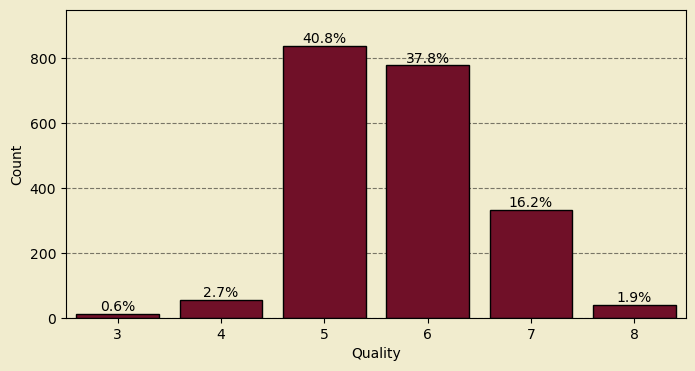

In [204]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='quality', color=main_color, edgecolor='black')
ax.set_facecolor('#F1ECCE')
fig.set_facecolor('#F1ECCE')
ax.grid(axis='y', color='black', linestyle='--', alpha=0.5, zorder=3)
ax.set_axisbelow(True)

ax.set_xlabel('Quality')
ax.set_ylabel('Count')
ax.set_ylim(0,950)


counts = df.groupby('quality')['Id'].count().divide(len(df))
for i, p in enumerate(ax.patches):
    x,_ = p.get_xy()
    y = p.get_height()
    w = p.get_width()
    ax.text(x+w/2, y+10, s=f'{round(counts.iloc[i]*100,1)}%', ha='center')
#plt.title("Most wine quality is either 5 or 6", fontweight='bold')

In this training set, most wine quality is either rated at 5 or 6 (around 78%). 

## 2b. Distribution of Features
<a id="2b"></a>

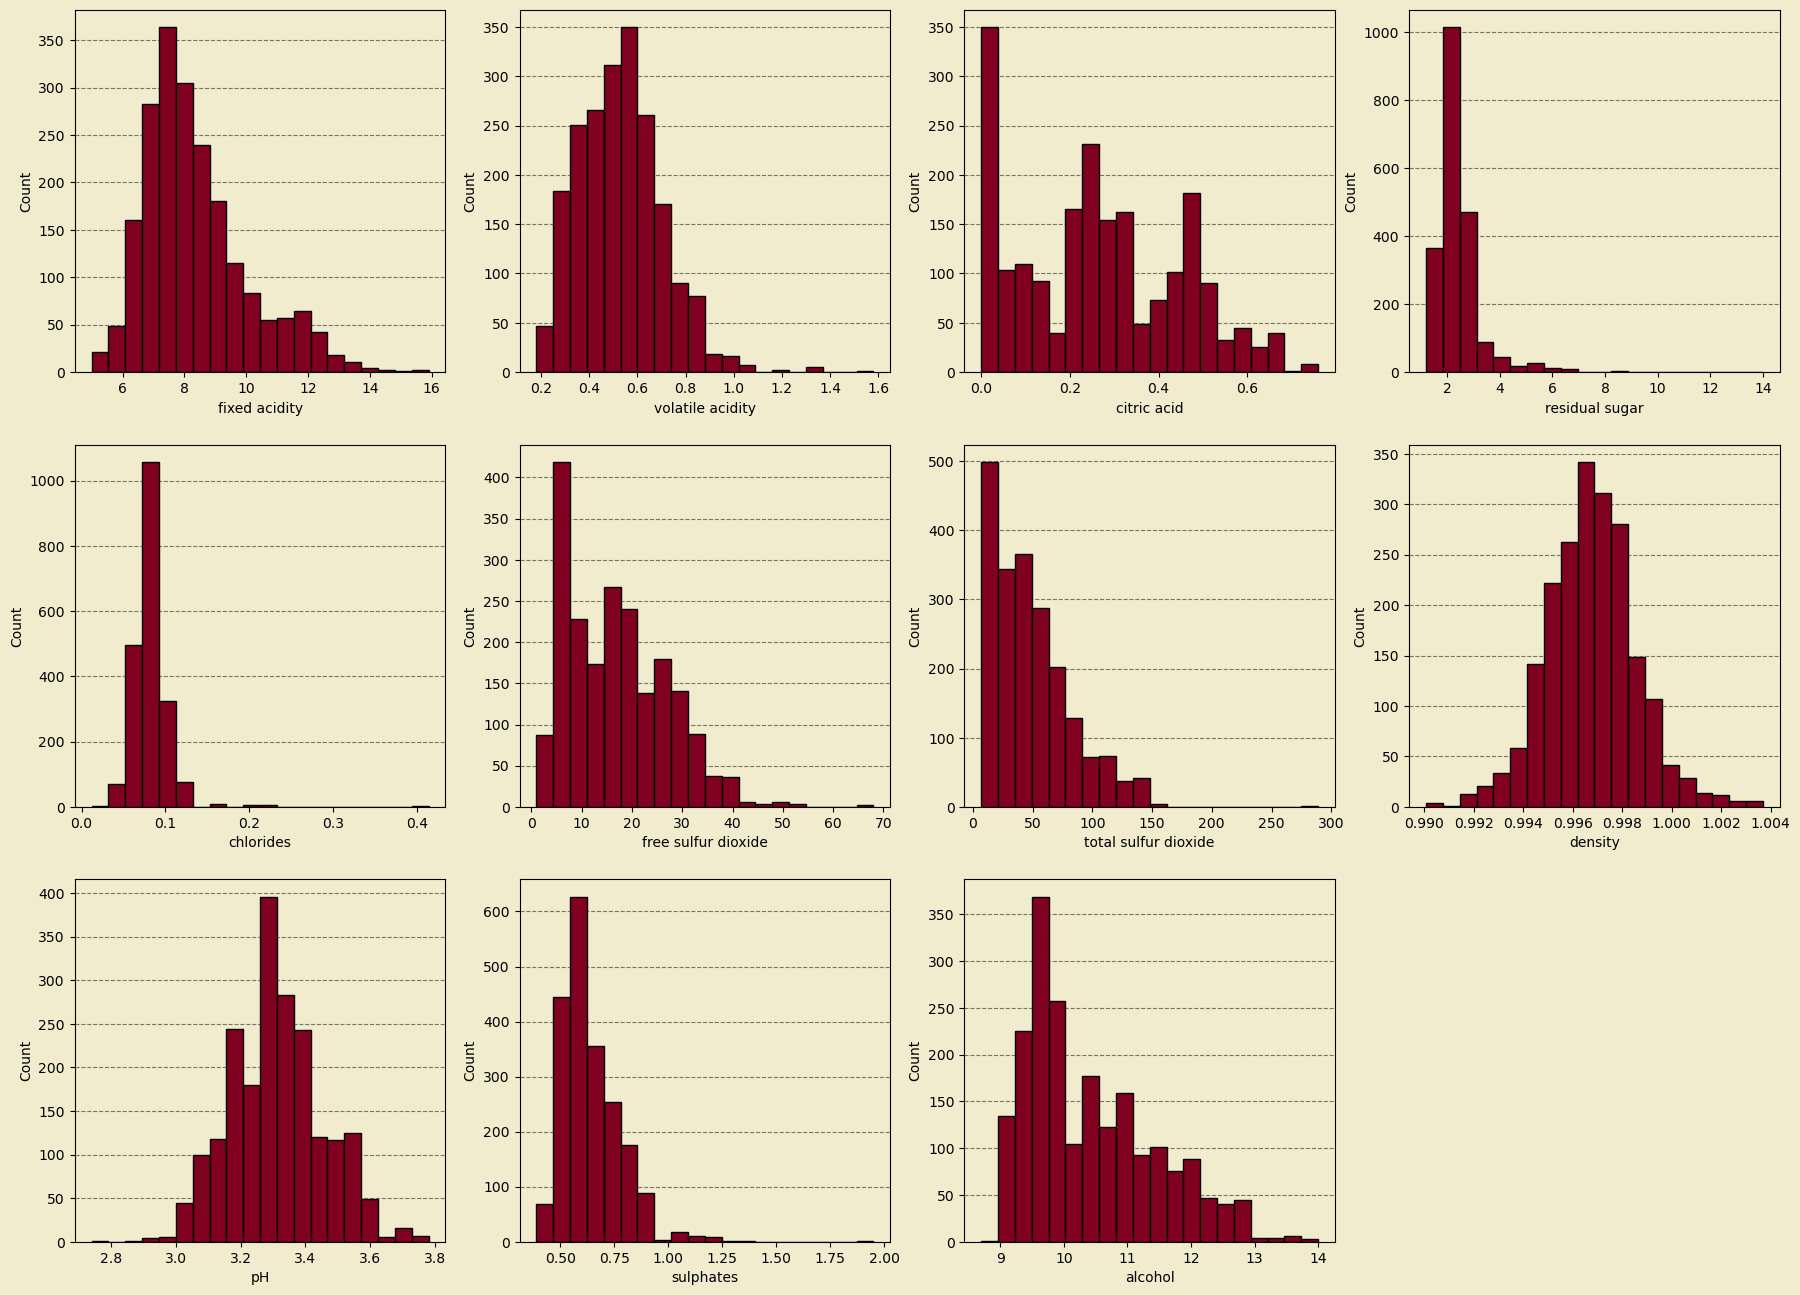

In [213]:
fig = plt.figure(figsize=(22,16))
fig.set_facecolor('#F1ECCE')
for i, col in enumerate(features):
    fig.add_subplot(3,4, i+1)
    ax = sns.histplot(data=df, x=col, bins=20, color=main_color, edgecolor='black', alpha=1)
    ax.set_facecolor('#F1ECCE')
    ax.grid(axis='y', color='black', linestyle='--', alpha=0.5, zorder=3)
    ax.set_axisbelow(True)


## 2c. Correlation among Variables
<a id="2c"></a>

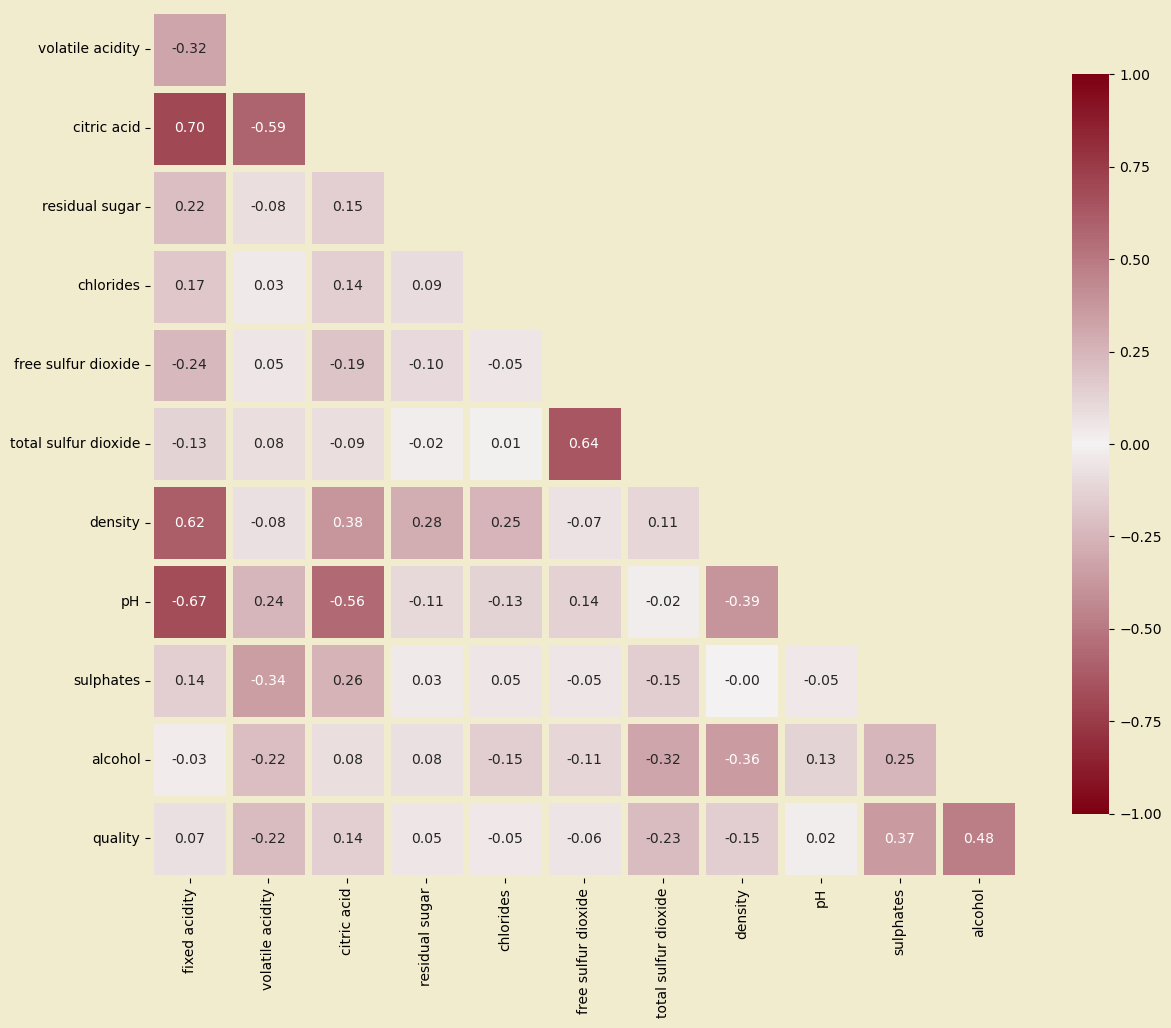

In [6]:
df_corr = df.drop(columns='Id').corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))[1:,:-1]

corr = df_corr.iloc[1:,:-1].copy()

# color scale
cmap = sns.diverging_palette(10,10,s=100,l=25, as_cmap=True)

fig = plt.figure(figsize=(14,12))
fig.set_facecolor('#F1ECCE')

ax = sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, square=True,cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, linewidths=5, linecolor="#F1ECCE")
ax.set_facecolor('#F1ECCE')




## 2d. Relationship between Features and Wine Quality
<a id="2d"></a>

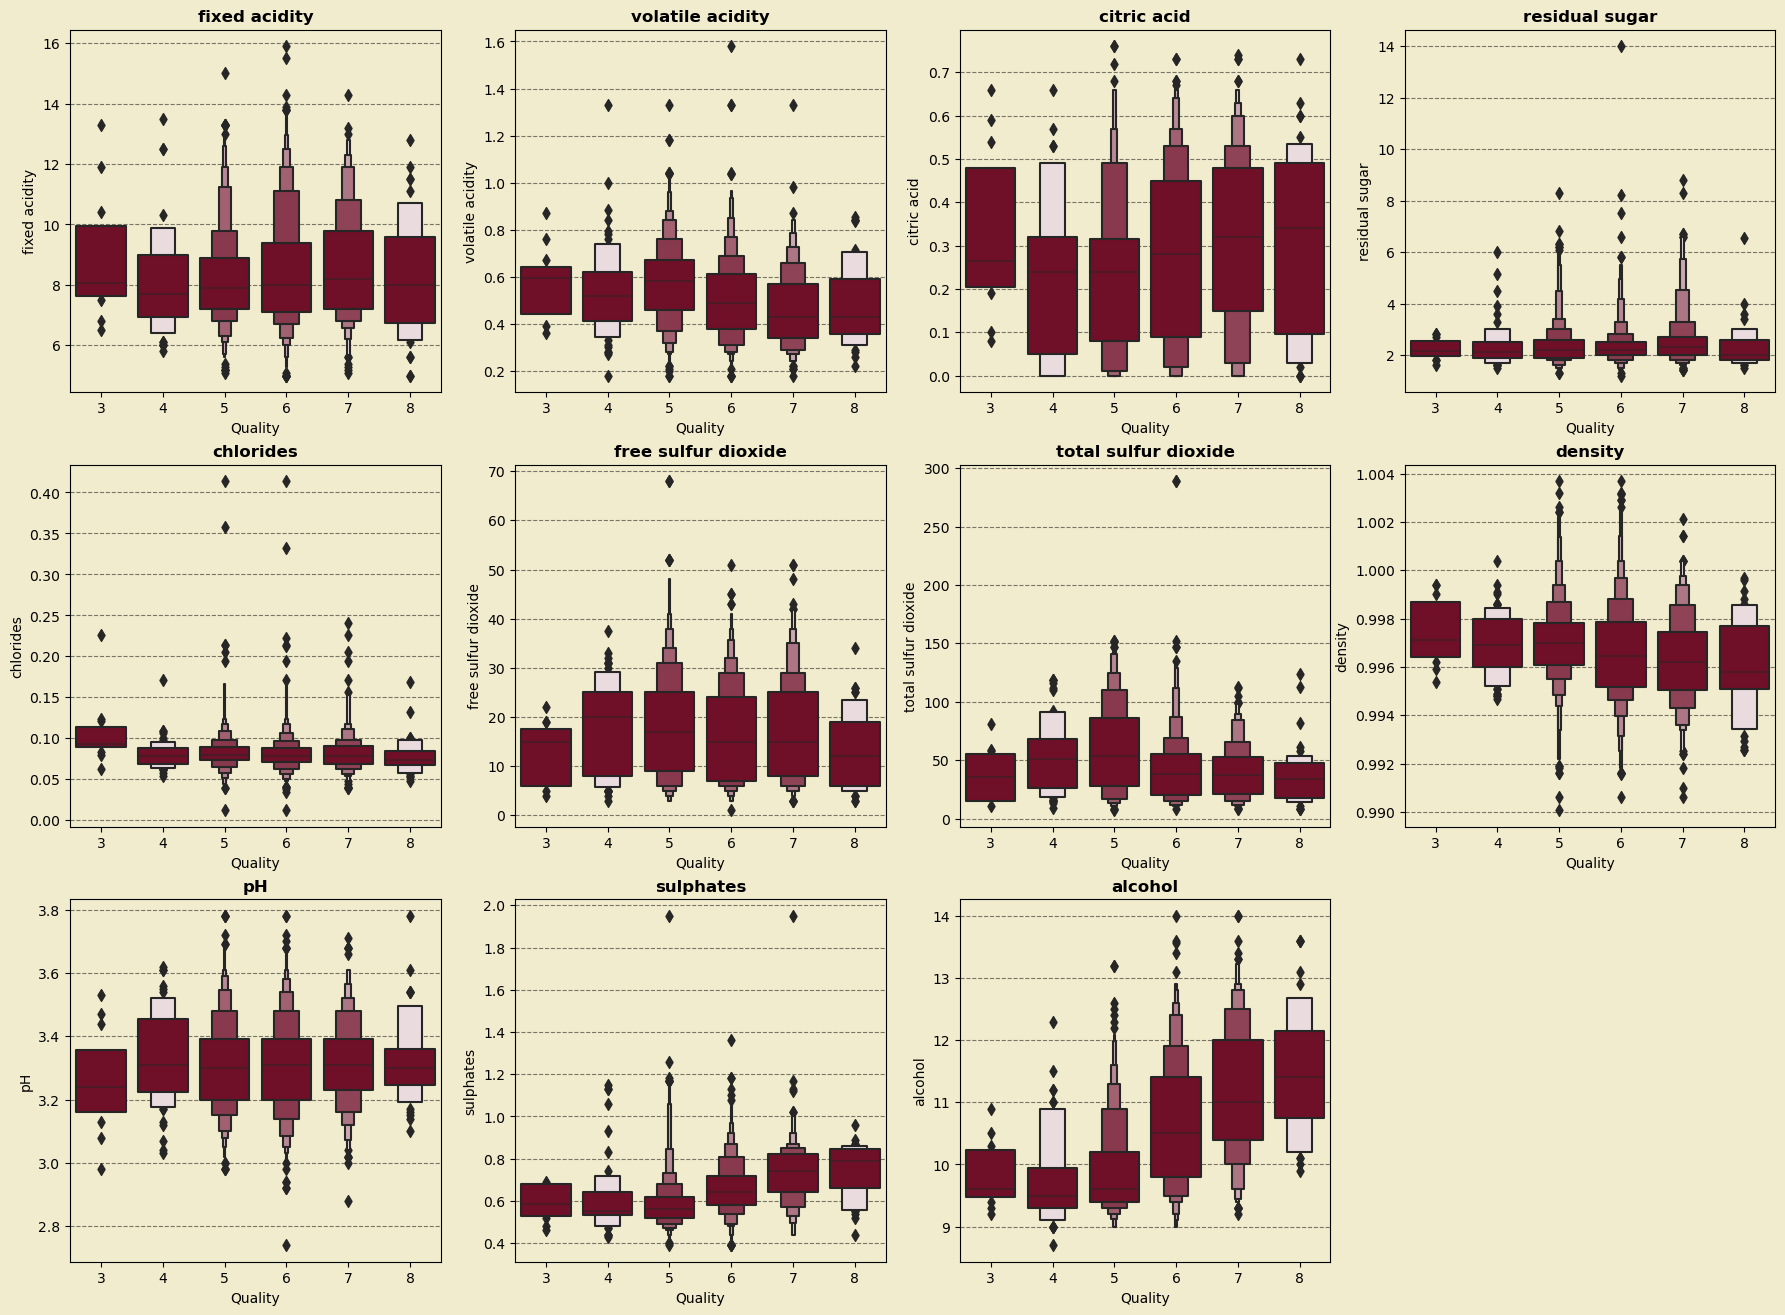

In [212]:
fig = plt.figure(figsize=(22,16))
fig.set_facecolor('#F1ECCE')
for i, col in enumerate(features):
    fig.add_subplot(3,4, i+1)
    ax = sns.boxenplot(data=df, x='quality', y=col, color=main_color,)
    ax.set_facecolor('#F1ECCE')
    ax.grid(axis='y', color='black', linestyle='--', alpha=0.5, zorder=3)
    ax.set_axisbelow(True)
    ax.set_xlabel('Quality')
    ax.set_title(col, weight='bold')

We see some relationships between the quality of the wine and individual features of the wine:
* Higher alcohol value tends to indicate a *higher* wine quality
* Higher sulphates value tends to indicate a *higher* wine quality
* Higher density value tends to indicate a *lower* wine quality
* Higher chlorides value tends to indicate a *lower* wine quality

## 2e. Relationship among Original Features
<a id="2e"></a>

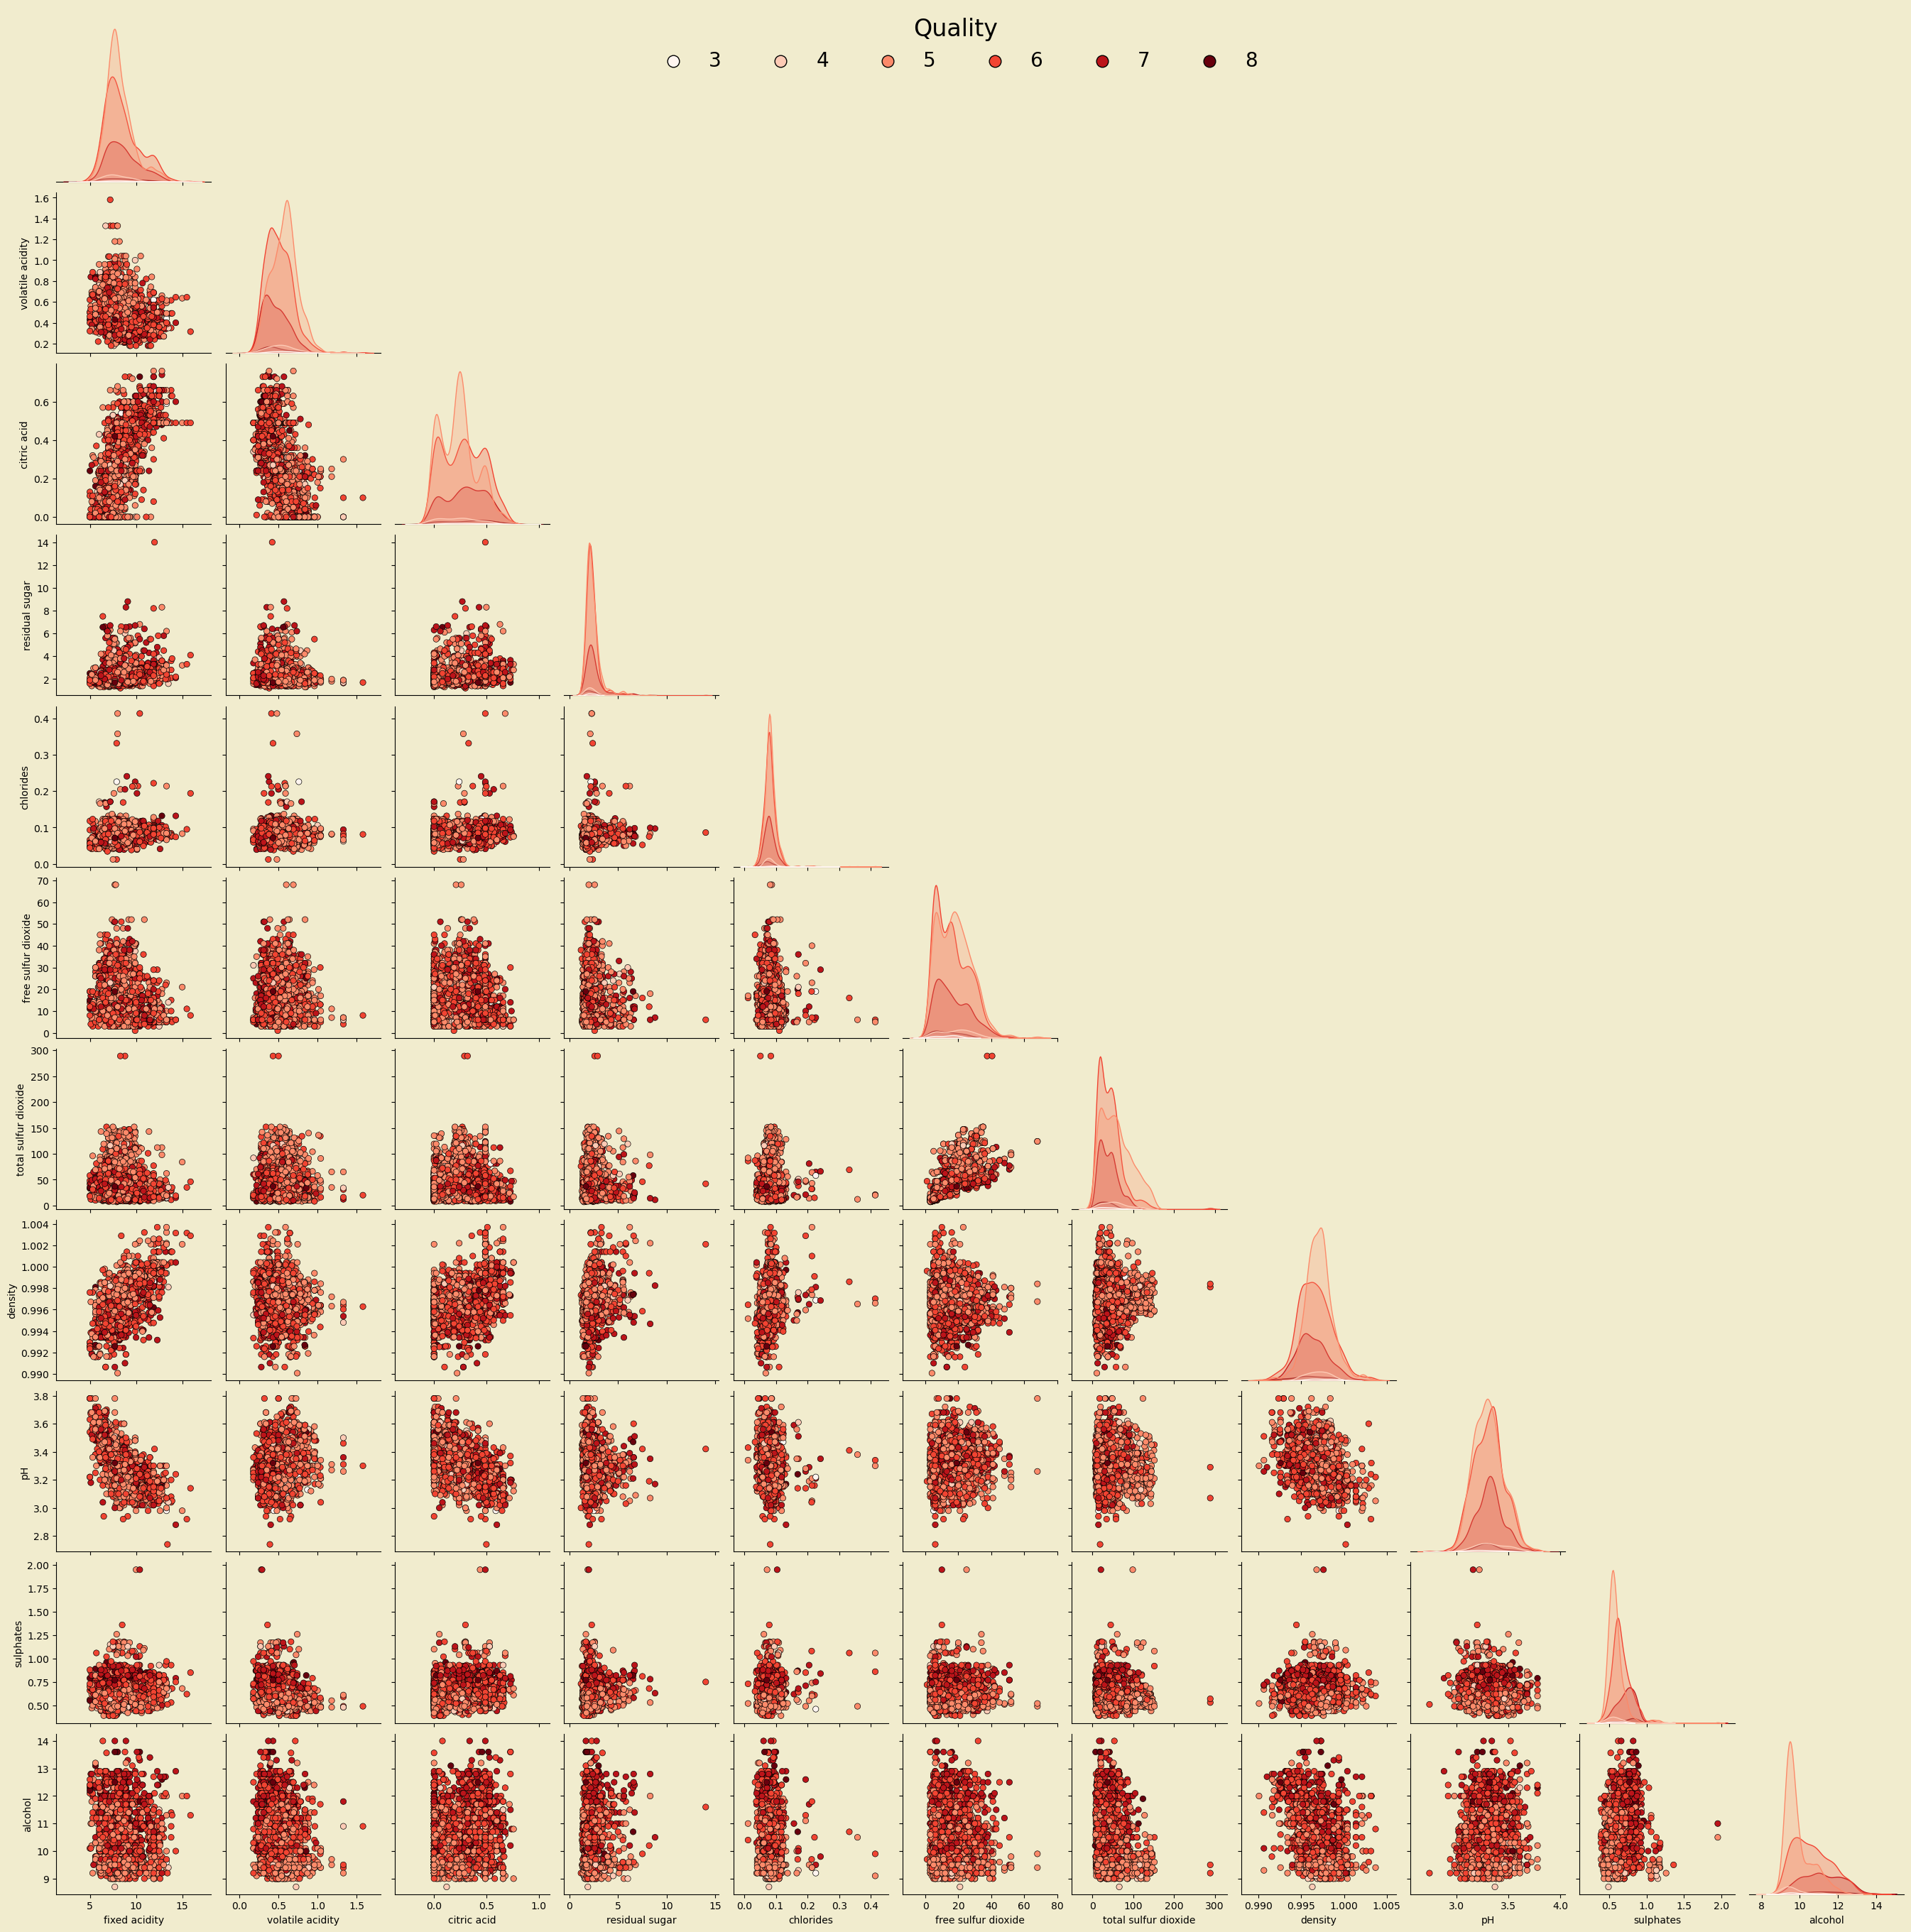

In [142]:
g = sns.pairplot(data=df, hue='quality', corner=True, palette='Reds' , diag_kind='kde',
             x_vars=features, y_vars=features,
                plot_kws = {'edgecolor':'black'})
g.fig.set_facecolor('#F1ECCE')

sns.move_legend(g, loc='upper center', fontsize=20, markerscale=2, edgecolor='black', title='Quality', title_fontsize=24, ncol=6)

# Change edgecolor for legend points to black
for ha in g.legend.legendHandles:
    ha.set_edgecolor('black')

# Set facecolor for each individual plot
for ax in g.axes.flat:
    if ax != None:
        ax.set_facecolor('#F1ECCE')

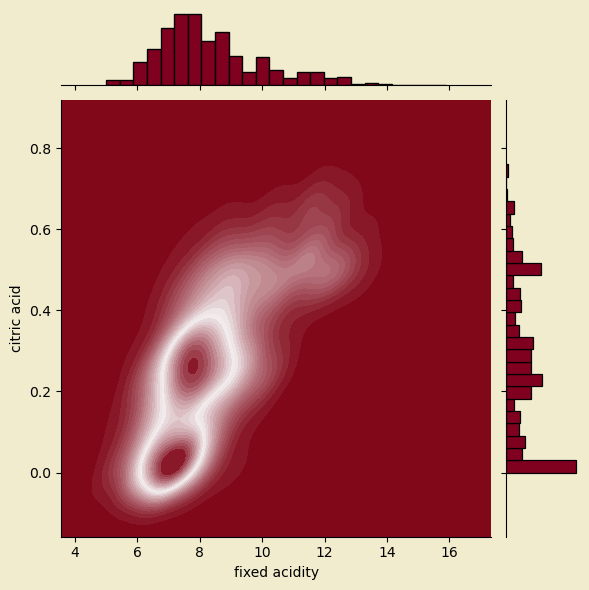

In [18]:
g = sns.JointGrid(data=df, x='fixed acidity', y='citric acid')
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=30, cmap=cmap)
g.plot_marginals(sns.histplot, color=main_color, alpha=1, bins=25)
g.ax_marg_x.set_facecolor('#F1ECCE')
g.ax_marg_y.set_facecolor('#F1ECCE')
g.fig.set_facecolor('#F1ECCE')

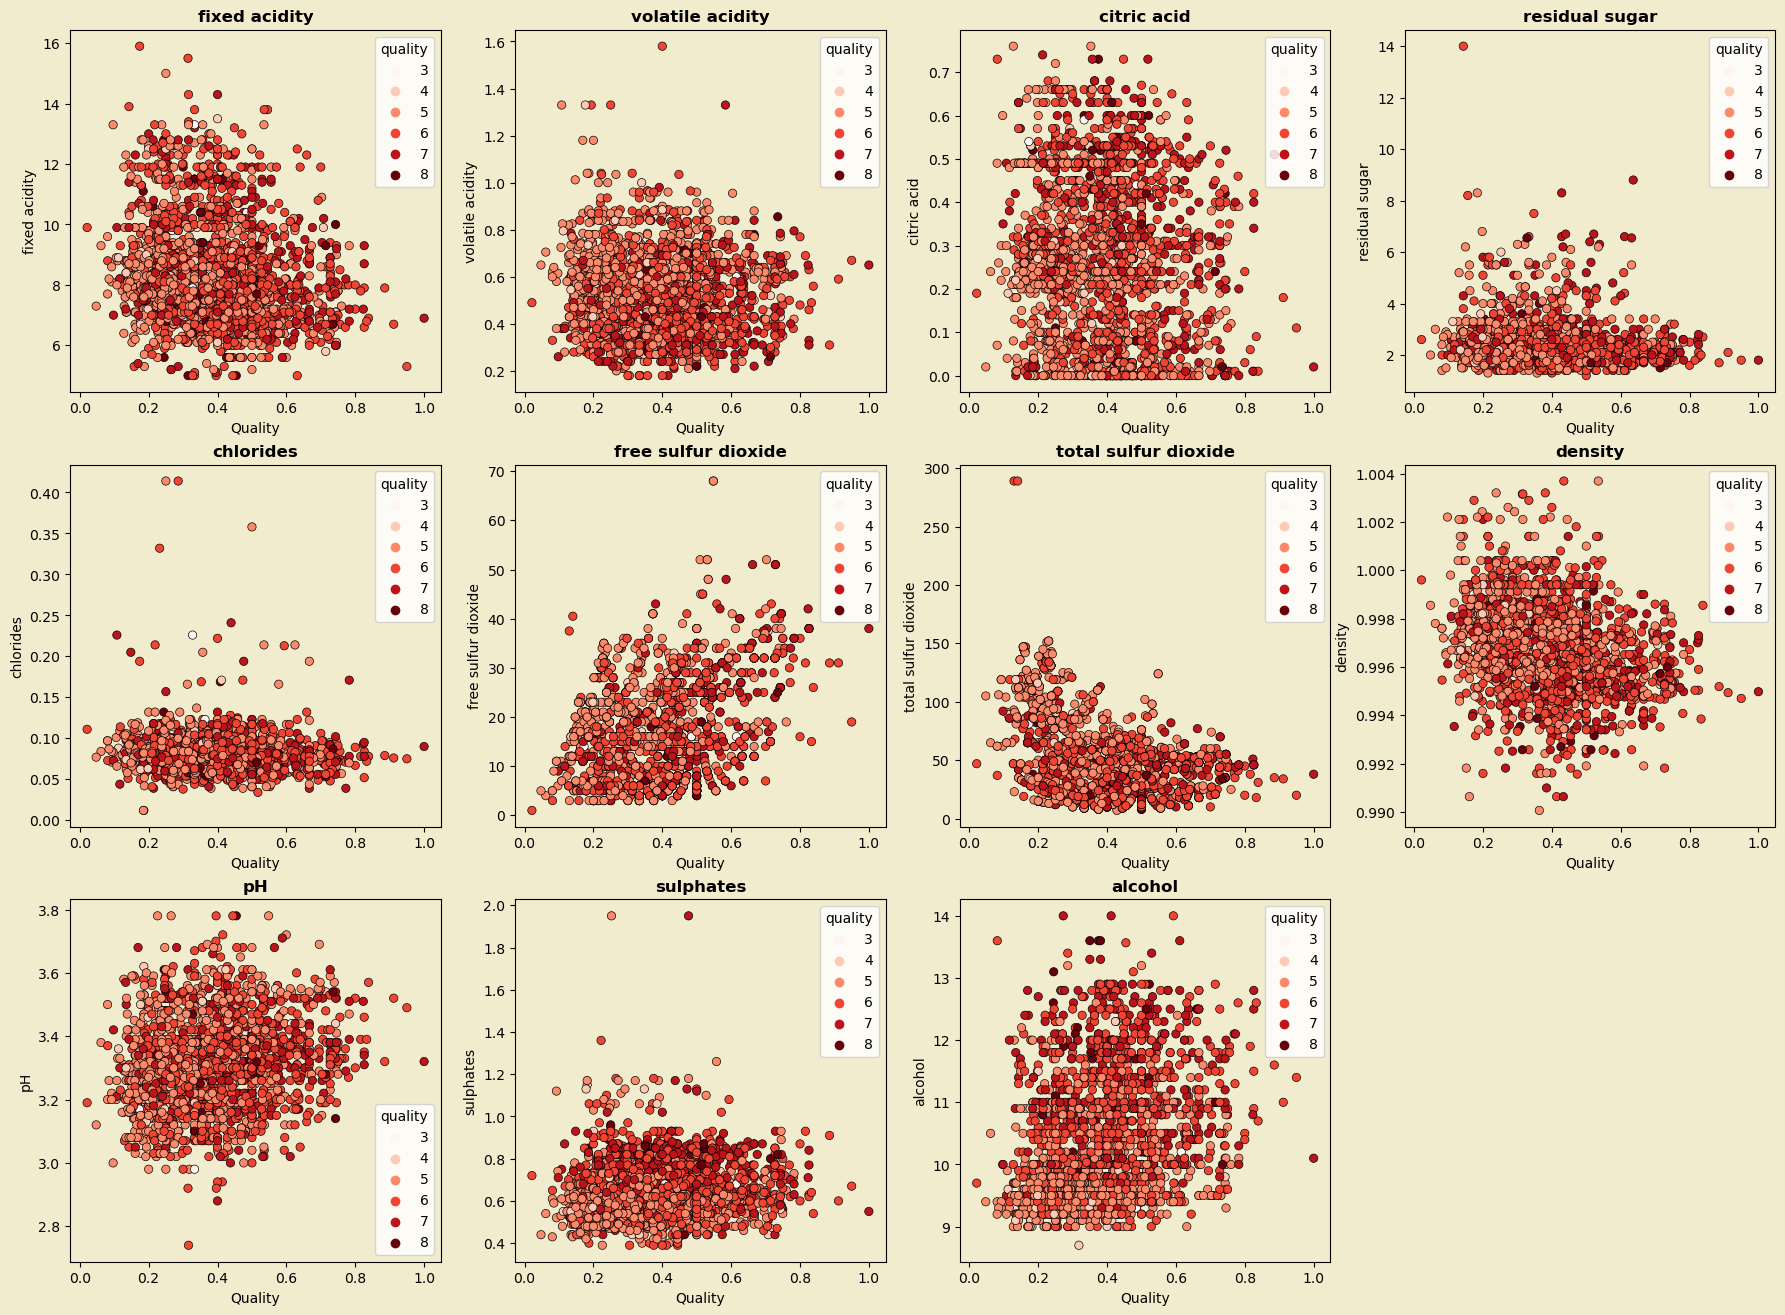

In [82]:
fig = plt.figure(figsize=(22,16))
fig.set_facecolor('#F1ECCE')
for i, col in enumerate(features):
    fig.add_subplot(3,4, i+1)
    ax = sns.scatterplot(data=df, x='sulfur ratio', y=col, hue='quality', edgecolor='black', palette='Reds')
    ax.set_facecolor('#F1ECCE')
    #ax.grid(axis='y', color='black', linestyle='--', alpha=0.5, zorder=3)
    #ax.set_axisbelow(True)
    ax.set_xlabel('Quality')
    ax.set_title(col, weight='bold')

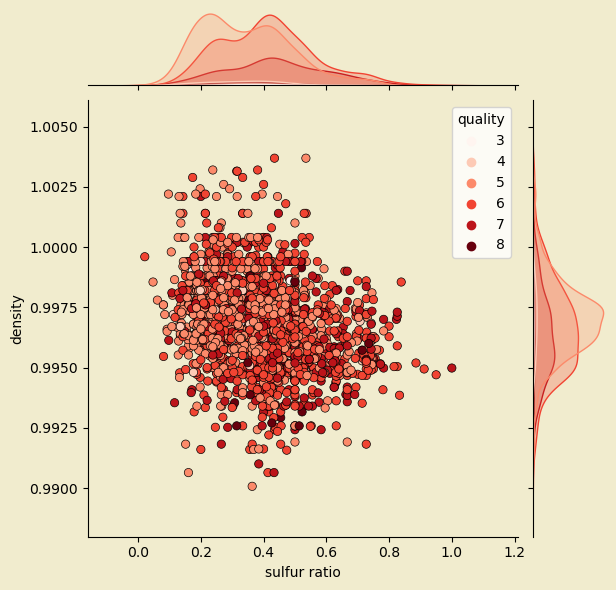

In [78]:
g = sns.jointplot(data=df, x="sulfur ratio", y="density", hue='quality', palette='Reds', edgecolor='black', kind='scatter')
g.ax_marg_x.set_facecolor('#F1ECCE')
g.ax_marg_y.set_facecolor('#F1ECCE')
g.fig.set_facecolor('#F1ECCE')
g.ax_joint.set_facecolor('#F1ECCE')

Simply put, Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars. The TSO2 level is also regulated by the U.S. Alcohol and Tobacco Tax and Trade Bureau (TTB): The maximum allowable concentration for a bottled wine is 350 ppm (mg/L) of TSO2. Theoretically, in a perfect world, the TSO2 in any wine should mirror the total of all the SO2 additions that have been made to it over the course of its history. However, the measured TSO2 rarely matches the expected amount perfectly, due to imprecise additions, SO2 removed with lees and sediments, and any volatile SO2 lost to the air https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/

In [66]:
df['free sulfur dioxide'].describe()

count    2056.000000
mean       16.955982
std        10.009710
min         1.000000
25%         8.000000
50%        16.000000
75%        24.000000
max        68.000000
Name: free sulfur dioxide, dtype: float64

In [72]:
df.groupby('quality')['sulfur ratio'].describe()

count      mean       std       min       25%       50%       75%  \
quality                                                                      
3         12.0  0.378561  0.111360  0.172840  0.326198  0.381818  0.417398   
4         55.0  0.359012  0.146094  0.112360  0.251050  0.347826  0.430952   
5        839.0  0.341355  0.143097  0.047619  0.227671  0.326087  0.436141   
6        778.0  0.411912  0.149700  0.021277  0.297609  0.408163  0.500000   
7        333.0  0.441949  0.157432  0.097826  0.333333  0.432432  0.545455   
8         39.0  0.388900  0.137292  0.184211  0.310096  0.363636  0.459416   

              max  
quality            
3        0.615385  
4        0.742857  
5        0.782609  
6        0.950000  
7        1.000000  
8        0.742857

# 3. Feature Engineering
<a id="3"></a>
Since there are no missing values in this dataset I will just focus on creating/modifying features

In [53]:
df['bound sulfur dioxide'] = (df['total sulfur dioxide'] - df['free sulfur dioxide'])
df['sulfur ratio'] = df['free sulfur dioxide']/df['total sulfur dioxide']

# 4. Modelling
<a id="4"></a>
